In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('iris (4).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

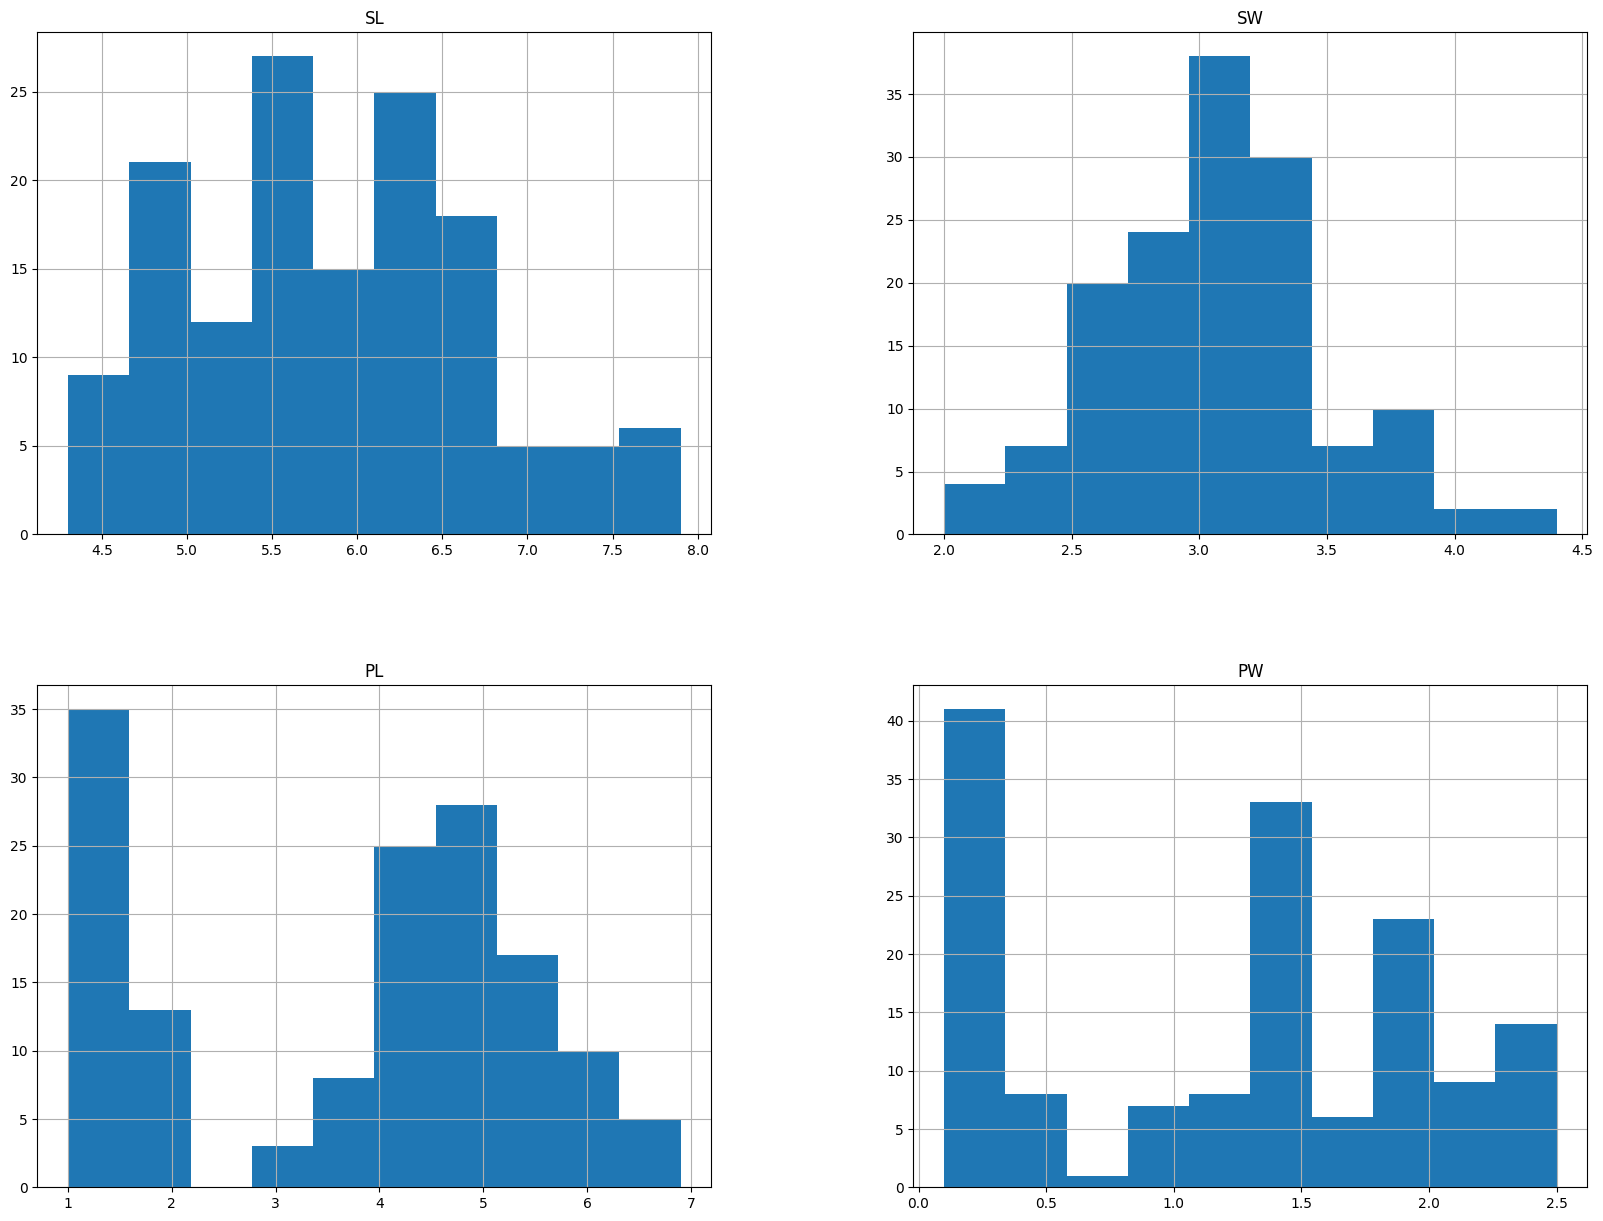

In [ ]:
 # code to check distribution
 freqgraph = data.select_dtypes(include=['float'])  # if there is more than one type use (include=['float','int'])
 freqgraph.hist(figsize=(20,15))
 plt.show

In [ ]:
#code for fill misssing values for many variables
for i in ['SL','SW','PL']:
  data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [ ]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


In [ ]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape

(120, 4)

In [ ]:
# SVM model using linear
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svmclf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


In [ ]:
# SVM model using rbf
from sklearn.svm import SVC
svmclf = SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svmclf.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [ ]:
#kNN 
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) # if metric='manhattan' use p=1
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

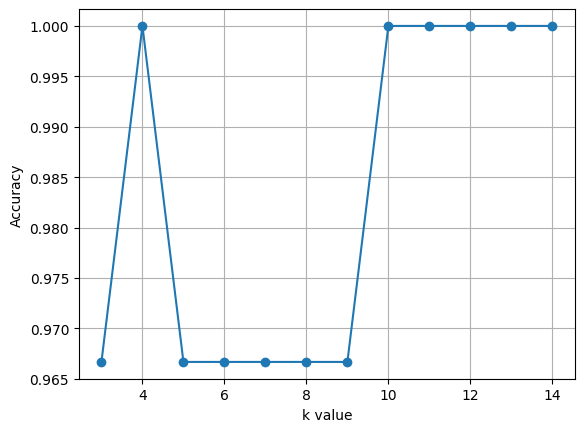

In [ ]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2) # if metric='manhattan' use p=1
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [ ]:
print('Accuracy is', accuracy_score(y_test,y_pred))
print('Precision is', precision_score(y_test,y_pred,average='macro'))
print('Recall is', recall_score(y_test,y_pred,average='macro'))
print('f1 score is', f1_score(y_test,y_pred,average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [ ]:
# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print('Accuracy is', accuracy_score(y_test,y_pred))
print('Precision is', precision_score(y_test,y_pred,average='macro'))
print('Recall is', recall_score(y_test,y_pred,average='macro'))
print('f1 score is', f1_score(y_test,y_pred,average='macro'))


Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


In [ ]:
c=print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_clf.predict(x_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
#Hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_clf1= RandomForestClassifier(random_state=42,n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20,
                       random_state=42)

In [ ]:
y_pred1 = rf_clf1.predict(x_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred1))

Accuracy is : 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred1))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
